In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

In [3]:
#Loading data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.shape

(891, 12)

In [6]:
test_df.shape

(418, 11)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Calculating the total null values per column and percentage of null values per column

total_null_by_column = train_df.isnull().sum().sort_values(ascending=False)

precentage_of_nulls_by_column = train_df.isnull().sum()/train_df.isnull().count()*100
updated_precentage_of_nulls_by_column = round(precentage_of_nulls_by_column,1).sort_values(ascending=False)

null_value_info = pd.concat([total_null_by_column,updated_precentage_of_nulls_by_column], axis=1, keys=['Total Null Values', '% Null Values'])

In [11]:
null_value_info.head()

,Total Null Values,% Null Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [12]:
# Plotting various features against survival to see their effect on survival 

train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


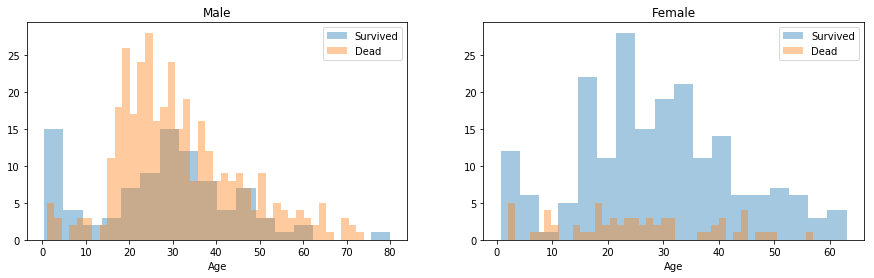

In [13]:
#1. Age and Sex

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,4))
male = train_df[train_df['Sex']=='male']
female = train_df[train_df['Sex']=='female']
ax = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=18, label='Survived', ax=axes[0], kde=False)
ax = sns.distplot(male[male['Survived']==0].Age.dropna(), bins=42, label='Dead', ax=axes[0], kde=False)
ax.set_title('Male')
ax.legend()

ax = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=18, label='Survived', ax=axes[1], kde=False)
ax = sns.distplot(female[female['Survived']==0].Age.dropna(), bins=42, label='Dead', ax=axes[1], kde=False)
ax.set_title('Female')
ax.legend()


#From this distplot, we can infer the following:

#1. Number of males being dead is high from 18 to 40 years.
#2. High number of male infants have survived.
#3. Survival rate for the women between 18 to 41 is pretty high to that of men in that range.


In [14]:
male = train_df[train_df['Sex']=='male']
female = train_df[train_df['Sex']=='female']
survivedmale = male[male['Survived'] == 1]
survivedfemale = female[female['Survived'] == 1]

#% male survived
print('% male survived --> {}'.format(survivedmale.Survived.count()/male.Survived.count()*100)) 

#% Female survived
print('% female survived --> {}'.format(survivedfemale.Survived.count()/female.Survived.count()*100))

% male survived --> 18.890814558058924
% female survived --> 74.20382165605095


# Percentage of females survived is a lot higher than that of men.

E:\Python\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


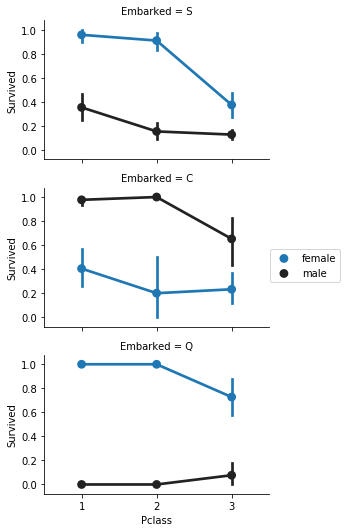

In [15]:
FacetGrid = sns.FacetGrid(train_df,row='Embarked',size=2.5,aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex', palette=None, order=None, hueorder=None)
FacetGrid.add_legend()

Most of the females who boarded at S and Q survived. While most of the men who boarded at C survived.

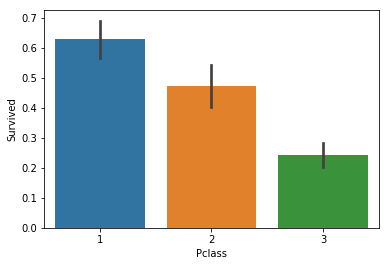

In [16]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

Clearly, the survival rate increases as class increases.

In [17]:
data = [train_df,test_df]
for dataset in data:
    dataset['Relatives'] = dataset['SibSp']+dataset['Parch']

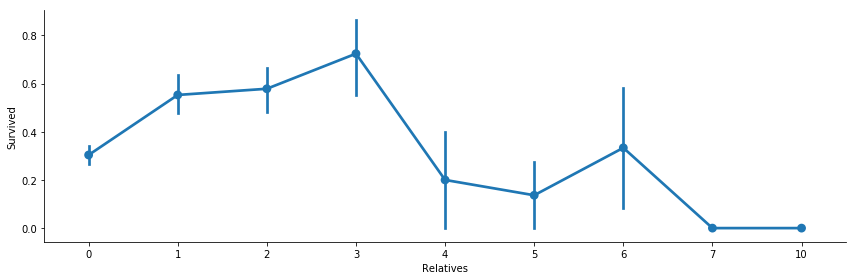

In [18]:
axes = sns.factorplot(x='Relatives',y='Survived',data=train_df,aspect=3)

If you dont have a relative on board, probability of your survival increases

Lets start Data Preprocessing

In [19]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Relatives'],
      dtype='object')

In [20]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [21]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Lets change cabin column to deck. First letter in cabin belongs to deck number. We will convert deck into numerical feature

In [22]:
import re
deck = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "U":8}
data  = [train_df,test_df]
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

train_df = train_df.drop(['Cabin'],axis=1)    
test_df = test_df.drop(['Cabin'],axis=1)    

In [23]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,8


Lets handle age by adding random ages inside the coundries(mean-std, mean+std)

In [24]:
data = [train_df,test_df]
for dataset in data:
    mean = train_df['Age'].mean()
    std = test_df['Age'].std()
    isnull = dataset['Age'].isnull().sum()
    randint = np.random.randint(mean-std,mean+std,isnull)
    ageslice = dataset['Age'].copy()
    ageslice[np.isnan(ageslice)] = randint
    dataset['Age'] = ageslice
    dataset['Age'] = dataset['Age'].astype(int)

Handling embardked null values by replacing them by the most common embarked value which is 'S'

In [25]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [26]:
data = [train_df,test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [27]:
train_df['Embarked'].isnull().sum()

0

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
Relatives    891 non-null int64
Deck         891 non-null int32
dtypes: float64(1), int32(2), int64(5), object(4)
memory usage: 76.6+ KB


Here, we can see fare as float. Lets handle that

In [29]:
data = [train_df,test_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

Lets handle names by creating new feature title and convert it into numerical feature

In [30]:
train_df.Name.tail()

886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [31]:
data = [train_df,test_df]
title = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
for database in data:
    database['Title'] = database.Name.str.extract('([a-zA-Z]+)\.',expand=False)
    database['Title'] = database['Title'].replace(['Lady','Capt','Col','Don','Countess','Dr'],'Rare')
    database['Title'] = database['Title'].replace('Ms','Miss')
    database['Title'] = database['Title'].replace('Mlle','Miss')
    database['Title'] = database['Title'].replace('Mme','Mrs')
    database['Title'] = database['Title'].map(title)
    database['Title'] = database['Title'].fillna(0)
    database['Title'] = database['Title'].astype(int)
    
train_df = train_df.drop('Name',axis=1)    
test_df = test_df.drop('Name',axis=1)    

In [32]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,8,1
1,1,1,female,38,1,0,PC 17599,71,C,1,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,8,2
3,1,1,female,35,1,0,113803,53,S,1,3,3
4,0,3,male,35,0,0,373450,8,S,0,8,1


Lets handle Sex

In [33]:
data = [train_df,test_df]
gender = {"male":0, "female":1}

for database in data:
    database['Sex'] = database['Sex'].map(gender)

In [34]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,8,1
1,1,1,1,38,1,0,PC 17599,71,C,1,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,0,8,2
3,1,1,1,35,1,0,113803,53,S,1,3,3
4,0,3,0,35,0,0,373450,8,S,0,8,1


In [35]:
train_df['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

Now, lets drop ticket from database since it has too many unique values. 

In [36]:
train_df = train_df.drop('Ticket',axis=1)    
test_df = test_df.drop('Ticket',axis=1)    

Convert embarked into numeric

In [37]:
data = [train_df,test_df]
embark = {"S":0, "C":1, "Q":2}

for database in data:
    database['Embarked'] = database['Embarked'].map(embark)

In [38]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Deck,Title
0,0,3,0,22,1,0,7,0,1,8,1
1,1,1,1,38,1,0,71,1,1,3,3
2,1,3,1,26,0,0,7,0,0,8,2
3,1,1,1,35,1,0,53,0,1,3,3
4,0,3,0,35,0,0,8,0,0,8,1


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null int32
Embarked     891 non-null int64
Relatives    891 non-null int64
Deck         891 non-null int32
Title        891 non-null int32
dtypes: int32(4), int64(7)
memory usage: 62.7 KB


In [40]:
train_df.Age.describe()

count    891.000000
mean      29.528620
std       13.556458
min        0.000000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [41]:
data = [train_df,test_df]
for database in data:
    database['Age'] = database['Age'].astype(int)
    database.loc[database['Age'] <= 11,'Age'] = 0
    database.loc[(database['Age'] > 11) & (database['Age'] <= 18),'Age'] = 1
    database.loc[(database['Age'] > 18) & (database['Age'] <= 22),'Age'] = 2
    database.loc[(database['Age'] > 22) & (database['Age'] <= 27),'Age'] = 3
    database.loc[(database['Age'] > 27) & (database['Age'] <= 33),'Age'] = 4
    database.loc[(database['Age'] > 23) & (database['Age'] <= 40),'Age'] = 5
    database.loc[database['Age'] > 40,'Age'] = 6

In [42]:
train_df['Age'].value_counts()

4    164
6    161
5    154
3    132
2    108
1    104
0     68
Name: Age, dtype: int64

In [43]:
train_df['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [44]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [45]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Deck,Title
0,0,3,0,2,1,0,0,0,1,8,1
1,1,1,1,5,1,0,3,1,1,3,3
2,1,3,1,3,0,0,0,0,0,8,2
3,1,1,1,5,1,0,3,0,1,3,3
4,0,3,0,5,0,0,1,0,0,8,1


In [46]:
data = [train_df, test_df]
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['Relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

Lets build some machine learning models on this:

In [47]:
X_train = train_df.drop('Survived',axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId',axis=1).copy()
#need to find Y_test

In [48]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred=random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)

In [49]:
acc_random_forest

92.82

Lets see which feature has how much importance in getting this much accuracy

In [50]:
importance = pd.DataFrame({'Feature':X_train.columns, 'Importance':np.round(random_forest.feature_importances_,3)})
importance = importance.sort_values('Importance',ascending=False).set_index('Feature')

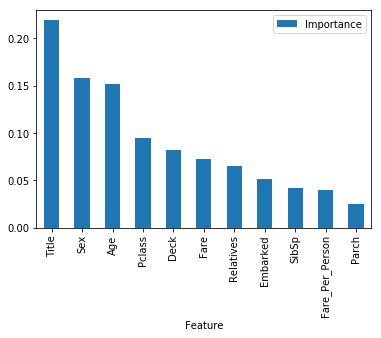

In [51]:
importance.plot.bar()

In [52]:
X_train = X_train.drop('Parch',axis=1)
X_test = X_test.drop('Parch',axis=1)

In [53]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(X_train,Y_train)
Y_pred=random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)


In [54]:
acc_random_forest

92.82

In [55]:
print('Accuracy: {}'.format(acc_random_forest))
a = np.round(random_forest.oob_score_,4)*100
print('oob score (Out-of-bag sample Score): {}%'.format(a))

Accuracy: 92.82
oob score (Out-of-bag sample Score): 82.04%


Looks like the accuracy has not been affected by reducing the feature parch.

Lets create confusion matrix.

In [56]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest,X_train,Y_train,cv=3)

In [57]:
confusion_matrix(Y_train,predictions)

array([[488,  61],
       [ 89, 253]], dtype=int64)

In [58]:
from sklearn.metrics import precision_score, recall_score

In [59]:
b = np.round(precision_score(Y_train,predictions),2)*100
print('Precision: {}%'.format(b))
print('Out of all those predictions which my model made as survived, {}% of those were right'.format(b))

Precision: 81.0%
Out of all those predictions which my model made as survived, 81.0% of those were right


In [60]:
c = np.round(recall_score(Y_train,predictions),2)*100
print('Recall: {}%'.format(c))
print('Out of all those actually survived in the real incident, my model claims that {}% of those were predicted rightly as survived'.format(c))

Recall: 74.0%
Out of all those actually survived in the real incident, my model claims that 74.0% of those were predicted rightly as survived


Lets calculate F-score: It is a combination of precision and recall.

In [61]:
from sklearn.metrics import f1_score
print('F-score: {}%'.format(np.round(f1_score(Y_train,predictions),2)*100))

F-score: 77.0%
